Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns

Reading Data

In [42]:
data = pd.read_csv("D:/Prodigy/Decision Tree Classifier/bank-full.csv", delimiter=';')

Data Sample

In [43]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Shape Of data

In [44]:
data.shape

(45211, 17)

Column Names

In [45]:
list(data.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

Data Types Of Columns

In [46]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

NA Values Per Column

In [47]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Distribution Of Output Column

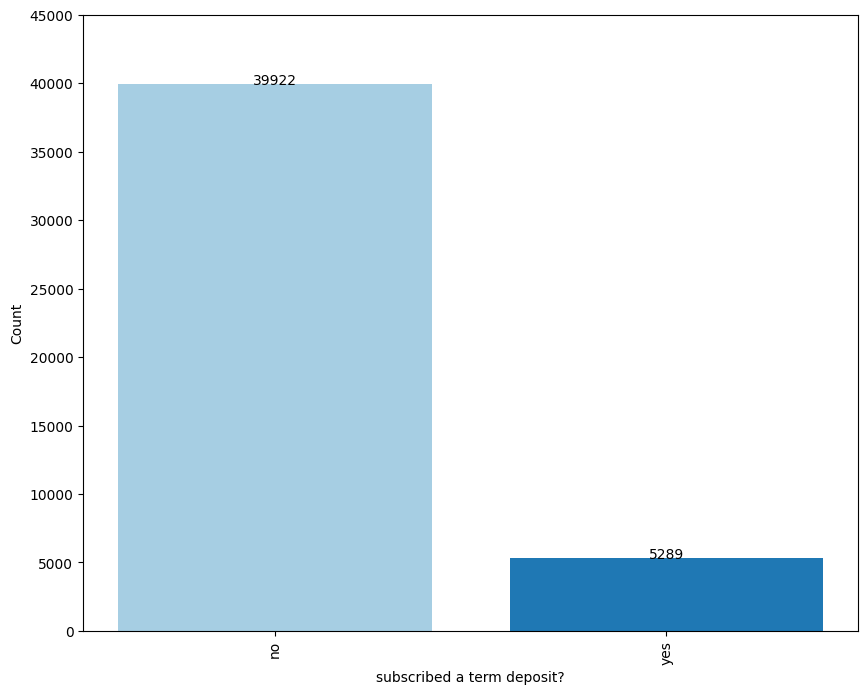

In [48]:
unique_lable = data["y"].value_counts()

plt.figure(figsize=(10, 8))
bars = plt.bar(unique_lable.index, unique_lable.values, color=plt.cm.Paired(range(len(unique_lable))))

for bar, count in zip(bars, unique_lable.values):
    plt.text(bar.get_x() + bar.get_width() / 2, count + 5, str(count), ha='center', fontsize=10)

#plt.title('Count of Each Unique Role')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.xlabel('subscribed a term deposit?')
plt.ylim(0, 45000)
plt.show()

Label Encoding

In [49]:
label_encoder = LabelEncoder()

for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

In [50]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


Data Split

In [51]:
class_0=data[data["y"]==0]
class_1=data[data["y"]==1]
lable_0=class_0.pop("y")
lable_1=class_1.pop("y")

In [52]:
x_train_0,x_temp_0,y_train_0,y_temp_0=train_test_split(class_0,lable_0,test_size=0.5, random_state=32)
x_val_0,x_test_0,y_val_0,y_test_0=train_test_split(x_temp_0,y_temp_0,test_size=0.6, random_state=32)
x_train_1,x_temp_1,y_train_1,y_temp_1=train_test_split(class_1,lable_1,test_size=0.5, random_state=32)
x_val_1,x_test_1,y_val_1,y_test_1=train_test_split(x_temp_1,y_temp_1,test_size=0.6, random_state=32)

In [53]:
x_train=pd.concat([x_train_0,x_train_1],axis=0)
x_val=pd.concat([x_val_0,x_val_1],axis=0)
x_test=pd.concat([x_test_0,x_test_1],axis=0)
y_train=pd.concat([y_train_0,y_train_1],axis=0)
y_val=pd.concat([y_val_0,y_val_1],axis=0)
y_test=pd.concat([y_test_0,y_test_1],axis=0)

In [40]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(x_train, y_train)
y_train_pred = tree_classifier.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = tree_classifier.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(test_accuracy)

1.0
0.8717192568563845


Hyper-parameter Tuning

[0.8830347268303472, 0.88940499889405, 0.8967927449679275, 0.9061269630612696, 0.9186463171864632, 0.9345277593452775, 0.9530634815306348, 0.968458305684583, 0.9827029418270294, 0.991152399911524, 0.9961955319619553, 0.9994691439946914, 1.0]
[0.8829904888299049, 0.8877460738774607, 0.8959301039593011, 0.9009068790090687, 0.8992479539924796, 0.8942711789427118, 0.8905109489051095, 0.8808891838088918, 0.878234903782349, 0.8748064587480646, 0.8709356337093563, 0.8699402786994028, 0.8700508737005087]


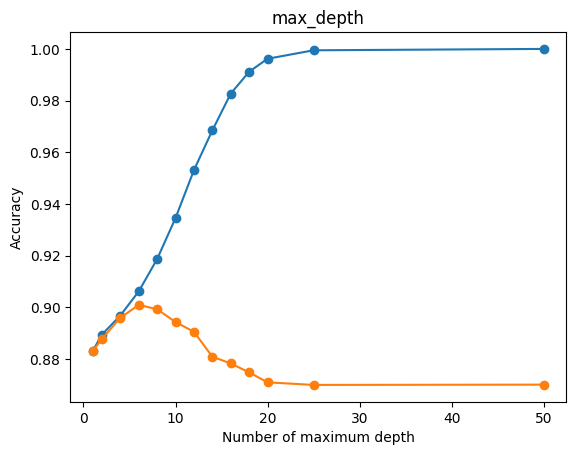

In [55]:
depth=[1,2,4,6,8,10,12,14,16,18,20,25,50]
train_result=[]
val_result=[]
for i in depth:
    tree_classifier = DecisionTreeClassifier(max_depth = i)
    tree_classifier.fit(x_train,y_train)
    y_train_pred = tree_classifier.predict(x_train)
    train_result.append(accuracy_score(y_train, y_train_pred))
    y_val_pred=tree_classifier.predict(x_val)
    val_result.append(accuracy_score(y_val,y_val_pred))

print(train_result)
print(val_result)


plt.plot(depth,train_result, marker='o', linestyle='-')
plt.plot(depth,val_result, marker='o', linestyle='-')
plt.xlabel("Number of maximum depth")
plt.ylabel('Accuracy')
plt.title('max_depth')
plt.show()

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.8582172085821721, 0.864852908648529, 0.8637469586374696, 0.8758018137580181, 0.8698296836982968, 0.8719309887193099, 0.8677283786772838, 0.8731475337314754, 0.871820393718204]


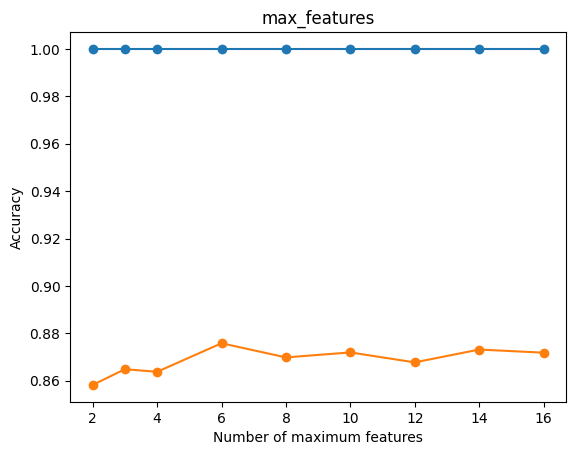

In [60]:
features=[2,3,4,6,8,10,12,14,16]
train_result=[]
val_result=[]
for i in features:
    tree_classifier = DecisionTreeClassifier(max_features = i)
    tree_classifier.fit(x_train,y_train)
    y_train_pred = tree_classifier.predict(x_train)
    train_result.append(accuracy_score(y_train, y_train_pred))
    y_val_pred=tree_classifier.predict(x_val)
    val_result.append(accuracy_score(y_val,y_val_pred))

print(train_result)
print(val_result)


plt.plot(features,train_result, marker='o', linestyle='-')
plt.plot(features,val_result, marker='o', linestyle='-')
plt.xlabel("Number of maximum features")
plt.ylabel('Accuracy')
plt.title('max_features')
plt.show()

In [62]:
list1=[]
depth = [1,2,4,6,8,10,12]
features=[2,3,4,6,8,10,12,14,16]
min_samples_s=[0.5,1.0,2,4,8,10,12,14,16]
for j in depth:
    for k in features:
        for l in min_samples_s:
            tree_classifier = DecisionTreeClassifier(max_depth = j, max_features = k, min_samples_split = l)
            tree_classifier.fit(x_train,y_train)
            y_train_pred = tree_classifier.predict(x_train)
            train_accuracy = accuracy_score(y_train, y_train_pred)
            y_val_pred=tree_classifier.predict(x_val)
            val_accuracy = accuracy_score(y_val,y_val_pred)
            list1.append((j,k,l,train_accuracy,val_accuracy))
            print(f'''For max_depth:{j},max_features:{k},min_samples_split:{l}
            train accuracy:{train_accuracy} validation accuracy:{val_accuracy}''')


For max_depth:1,max_features:2,min_samples_split:0.5
            train accuracy:0.8830347268303472 validation accuracy:0.8829904888299049
For max_depth:1,max_features:2,min_samples_split:1.0
            train accuracy:0.8830347268303472 validation accuracy:0.8829904888299049
For max_depth:1,max_features:2,min_samples_split:2
            train accuracy:0.8830347268303472 validation accuracy:0.8829904888299049
For max_depth:1,max_features:2,min_samples_split:4
            train accuracy:0.8830347268303472 validation accuracy:0.8829904888299049
For max_depth:1,max_features:2,min_samples_split:8
            train accuracy:0.8830347268303472 validation accuracy:0.8829904888299049
For max_depth:1,max_features:2,min_samples_split:10
            train accuracy:0.8830347268303472 validation accuracy:0.8829904888299049
For max_depth:1,max_features:2,min_samples_split:12
            train accuracy:0.8830347268303472 validation accuracy:0.8829904888299049
For max_depth:1,max_features:2,min_samples

In [66]:
list1

[(1, 2, 0.5, 0.8830347268303472, 0.8829904888299049),
 (1, 2, 1.0, 0.8830347268303472, 0.8829904888299049),
 (1, 2, 2, 0.8830347268303472, 0.8829904888299049),
 (1, 2, 4, 0.8830347268303472, 0.8829904888299049),
 (1, 2, 8, 0.8830347268303472, 0.8829904888299049),
 (1, 2, 10, 0.8830347268303472, 0.8829904888299049),
 (1, 2, 12, 0.8830347268303472, 0.8829904888299049),
 (1, 2, 14, 0.8830347268303472, 0.8829904888299049),
 (1, 2, 16, 0.8830347268303472, 0.8829904888299049),
 (1, 3, 0.5, 0.8830347268303472, 0.8829904888299049),
 (1, 3, 1.0, 0.8830347268303472, 0.8829904888299049),
 (1, 3, 2, 0.8830347268303472, 0.8829904888299049),
 (1, 3, 4, 0.8830347268303472, 0.8829904888299049),
 (1, 3, 8, 0.8830347268303472, 0.8829904888299049),
 (1, 3, 10, 0.8830347268303472, 0.8829904888299049),
 (1, 3, 12, 0.8830347268303472, 0.8829904888299049),
 (1, 3, 14, 0.8830347268303472, 0.8829904888299049),
 (1, 3, 16, 0.8830347268303472, 0.8829904888299049),
 (1, 4, 0.5, 0.8830347268303472, 0.8829904888299

In [67]:
all_train_acc=[list1[i][3] for i in range(len(list1))]
all_val_acc=[list1[i][4] for i in range(len(list1))]
print(all_train_acc)
print(all_val_acc)

[0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472, 0.8830347268303472,

In [68]:
import heapq
max_5_val_acc = heapq.nlargest(10, all_val_acc)
max_5_val_acc

[0.9033399690333996,
 0.9030081840300819,
 0.9028975890289759,
 0.902565804025658,
 0.9021234240212342,
 0.9020128290201282,
 0.9019022340190224,
 0.9017916390179164,
 0.9017916390179164,
 0.9016810440168105]

In [70]:
for i in range(len(max_5_val_acc)):
    print(list1[all_val_acc.index(max_5_val_acc[i])])


(6, 14, 12, 0.9059500110595001, 0.9033399690333996)
(8, 14, 8, 0.9182481751824818, 0.9030081840300819)
(6, 10, 14, 0.9060827250608272, 0.9028975890289759)
(6, 12, 16, 0.9074983410749834, 0.902565804025658)
(8, 10, 10, 0.9148860871488609, 0.9021234240212342)
(6, 12, 4, 0.9055076310550763, 0.9020128290201282)
(6, 14, 8, 0.9054191550541916, 0.9019022340190224)
(6, 10, 16, 0.9078080070780801, 0.9017916390179164)
(6, 10, 16, 0.9078080070780801, 0.9017916390179164)
(8, 6, 16, 0.9128069011280691, 0.9016810440168105)


Final Model

In [71]:
tree_classifier = DecisionTreeClassifier(max_depth = 6,max_features = 14, min_samples_split = 12)
tree_classifier.fit(x_train, y_train)
y_train_pred = tree_classifier.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = tree_classifier.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(test_accuracy)

0.906746295067463
0.9007667354762607


Precision, Recall and F1 Score

In [72]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.61      0.41      0.49      1587

    accuracy                           0.90     13564
   macro avg       0.77      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564



Confusion Matrix

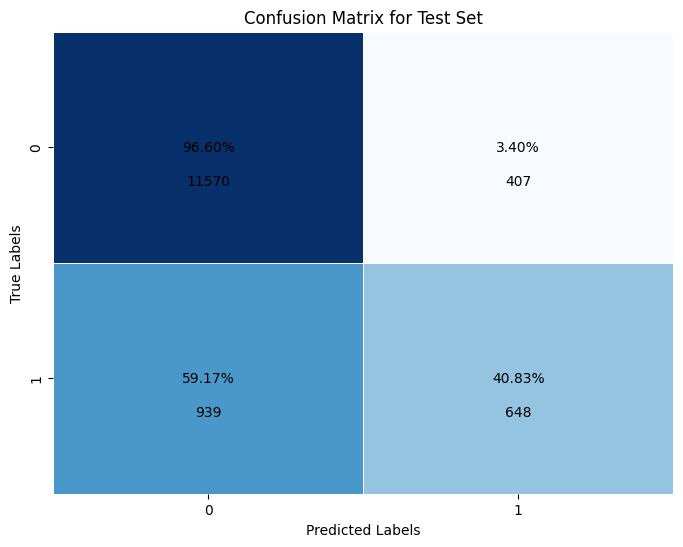

In [75]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    conf_matrix = confusion_matrix(y_true, y_pred)
    row_sums = conf_matrix.sum(axis=1, keepdims=True)
    conf_matrix_percent = conf_matrix / row_sums * 100
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_percent, annot=False, fmt=".2f", cmap="Blues", cbar=False, 
                linewidths=.5)

    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j + 0.5, i + 0.5, f"{conf_matrix_percent[i, j]:.2f}%",
                     horizontalalignment="center",
                     verticalalignment="center", color="black", fontsize=10)
            plt.text(j + 0.5, i + 0.65, f"{conf_matrix[i, j]}",
                     horizontalalignment="center",
                     verticalalignment="center", color="black", fontsize=10)
    
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()
plot_confusion_matrix(y_test, y_test_pred, "Confusion Matrix for Test Set")